<a href="https://colab.research.google.com/github/Ruchika810/ML-Classification/blob/main/Cardiovascular_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, 
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.                                                                                                                                                                                           
Variables                                                              
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.                                                                
Data Description                                                        
Demographic:                                                           
• Sex: male or female("M" or "F")                                      
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)                        
Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")                                                               
                                                                      • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)                                                                                                                          
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)                                                     
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)                                                              
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)                                                              
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)                                                              
• Tot Chol: total cholesterol level (Continuous)                       
• Sys BP: systolic blood pressure (Continuous)                         
• Dia BP: diastolic blood pressure (Continuous)                        
• BMI: Body Mass Index (Continuous)                                    
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)                                                   
• Glucose: glucose level (Continuous)                                  
Predict variable (desired target)                                       
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)                                                      -
DV

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
from scipy.stats import zscore
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Reading and Understanding data

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv', encoding= 'unicode_escape',parse_dates=True)

In [4]:
# Exploring the first five rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Exploring the last five rows of the dataset
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Inspecting the length and number of columns of the dataset
df.shape

(3390, 17)

In [7]:
# Checking null values and data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
#Null Values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
# duplicate
print(df[df.duplicated()].sum())

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64


In [10]:
# Finding statistical measures of numerical columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


#Exploratory Data Analysis

In [11]:
# Extracting names of numerical columns from the data
numeric_features = df.describe().columns
numeric_features

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

##Visualization of Numerical Features

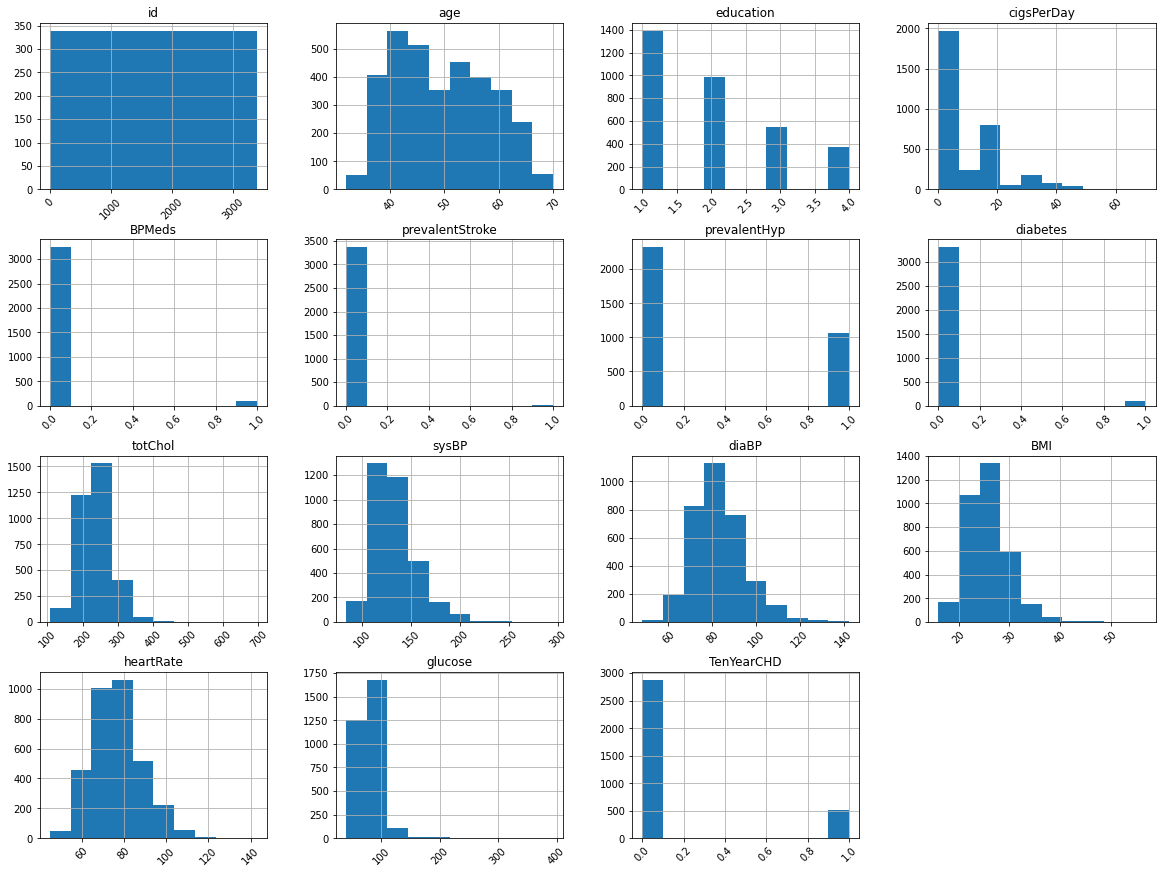

In [12]:
df.hist(figsize = (20,15),xrot=45)
plt.show()

##Visualization Of Categorical Features

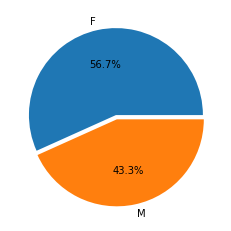

In [13]:
#Create a pie chart 
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().keys(),explode=(0,0.05),autopct='%.1f%%')
plt.show()

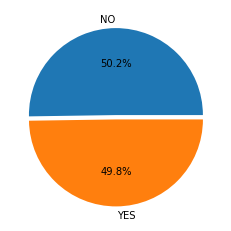

In [14]:
#Create a pie chart 
plt.pie(df['is_smoking'].value_counts(), labels=df['is_smoking'].value_counts().keys(),explode=(0,0.05),autopct='%.1f%%')
plt.show()

In [15]:
# Extracting names of categorical columns from the data
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

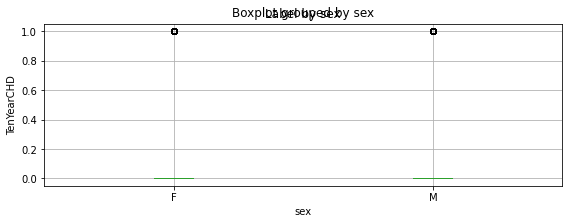

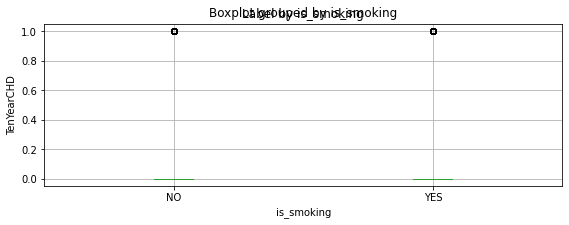

In [16]:
# Box plot of categorical features with respect to dependent variable
for col in categorical_features:
    fig = plt.figure(figsize=(9, 3))
    ax = fig.gca()
    df.boxplot(column = 'TenYearCHD', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("TenYearCHD")
plt.show()

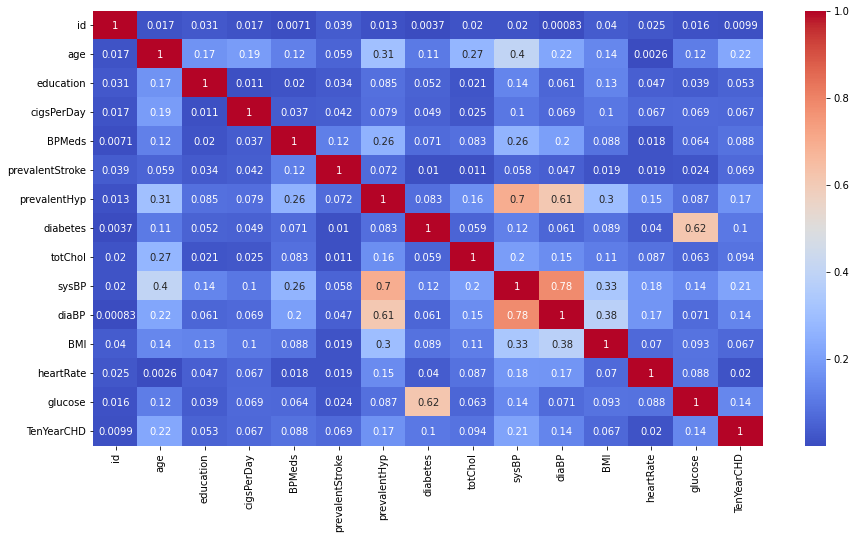

In [17]:
## Correlation matrix
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [18]:
df['BP'] = (df['diaBP']+df['sysBP'])/2

In [19]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BP
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,116.50
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,133.00
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,93.50
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,123.00
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,110.75


In [20]:
df1 = df[['age', 'sex', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'BP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

In [21]:
df1.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BP,BMI,heartRate,glucose,TenYearCHD
0,64,F,3.0,0.0,0,0,0,221.0,116.50,NaN,90.0,80.0,1
1,36,M,0.0,0.0,0,1,0,212.0,133.00,29.77,72.0,75.0,0
2,46,F,10.0,0.0,0,0,0,250.0,93.50,20.35,88.0,94.0,0
3,50,M,20.0,0.0,0,1,0,233.0,123.00,28.26,68.0,94.0,1
4,64,F,30.0,0.0,0,0,0,241.0,110.75,26.42,70.0,77.0,0


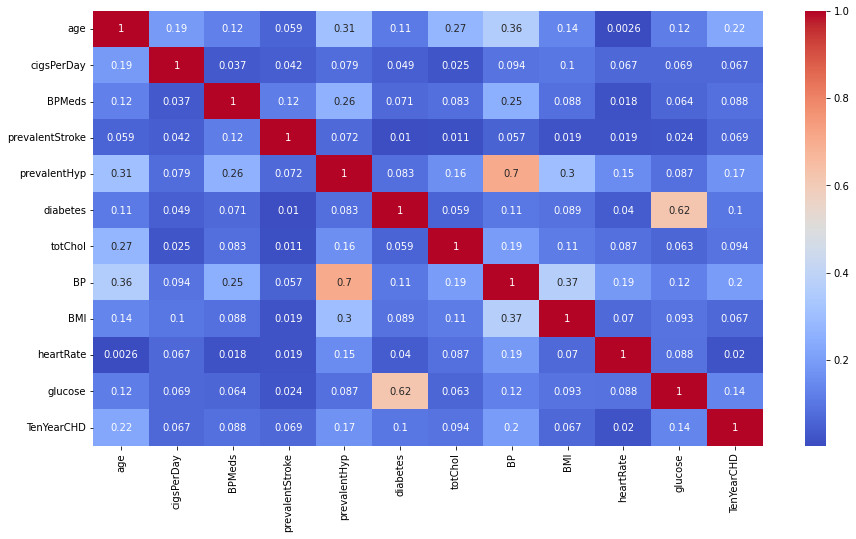

In [22]:
## Correlation matrix
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

#Data Preparation

In [23]:
# Converting categorical features to numeric 
#label encoding
encoders_nums = {"sex":{"M":1,"F":0} ,"is_smoking":{"YES":1,"NO":0}}
df1= df1.replace(encoders_nums)

In [24]:
 #Defining imputer
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df1.values))

In [25]:
df2 = df2.rename({0: 'age', 1: 'sex',2: 'cigsPerDay', 3: 'BPMeds',
                  4: 'prevalentStroke', 5: 'prevalentHyp',6: 'diabetes',
                  7: 'totChol',8: 'BP', 9: 'BMI', 10: 'heartRate', 11: 'glucose', 12: 'TenYearCHD'}, axis=1)

In [26]:
df2.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BP,BMI,heartRate,glucose,TenYearCHD
0,64.0,0.0,3.0,0.0,0.0,0.0,0.0,221.0,116.50,26.912,90.0,80.0,1.0
1,36.0,1.0,0.0,0.0,0.0,1.0,0.0,212.0,133.00,29.770,72.0,75.0,0.0
2,46.0,0.0,10.0,0.0,0.0,0.0,0.0,250.0,93.50,20.350,88.0,94.0,0.0
3,50.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,123.00,28.260,68.0,94.0,1.0
4,64.0,0.0,30.0,0.0,0.0,0.0,0.0,241.0,110.75,26.420,70.0,77.0,0.0


In [28]:
#Normalizing the features
X = df2.iloc[:,:12].apply(zscore)

In [29]:
y = df2['TenYearCHD'].values

In [30]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

#Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
# Get the predicted probabilities
lr_train_preds = clf.predict_proba(X_train)
lr_test_preds = clf.predict_proba(X_test)

In [34]:
lr_train_preds = clf.predict_proba(X_train)[:,1]
lr_test_preds = clf.predict_proba(X_test)[:,1]

In [35]:
# Get the predicted classes
lr_train_class_preds = clf.predict(X_train)
lr_test_class_preds = clf.predict(X_test)

In [36]:
# Get the accuracy scores
lr_train_accuracy = accuracy_score(y_train,lr_train_class_preds)
lr_test_accuracy = accuracy_score(y_test,lr_test_class_preds)
# Get the f1 scores
lr_train_f1score = f1_score(y_train,lr_train_class_preds)
lr_test_f1score = f1_score(y_test,lr_test_class_preds)
# Get the precision scores
lr_train_precision = precision_score(y_train,lr_train_class_preds)
lr_test_precision = precision_score(y_test,lr_test_class_preds)
# Get the recall scores
lr_train_recall = recall_score(y_train,lr_train_class_preds)
lr_test_recall = recall_score(y_test,lr_test_class_preds)
#Get the roc score
lr_train_roc = roc_auc_score(y_train,lr_train_preds)
lr_test_roc = roc_auc_score(y_test,lr_test_preds)

In [37]:
lr_dict=pd.DataFrame({'train_accuracy':lr_train_accuracy,'test_accuracy':lr_test_accuracy,'train_f1score':lr_train_f1score,'test_f1score':lr_test_f1score,'train_precision':lr_train_precision,'test_precision':lr_test_precision,'test_recall':lr_test_recall,'train_recall':lr_train_recall,'train_roc':lr_train_roc,'test_roc':lr_train_roc},index=['Logistic Regression'])
lr_dict

,train_accuracy,test_accuracy,train_f1score,test_f1score,train_precision,test_precision,test_recall,train_recall,train_roc,test_roc
Logistic Regression,0.854839,0.862028,0.110843,0.181818,0.741935,0.8125,0.102362,0.059896,0.720127,0.720127


In [38]:
confusion_matrix(y_test,lr_test_class_preds)

array([[718,   3],
       [114,  13]])

#GridSearchCV LR

In [39]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
lr_grid=GridSearchCV(logreg,grid,cv=10)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [40]:
lr_train_preds_cv = lr_grid.predict_proba(X_train)[:,1]
lr_test_preds_cv = lr_grid.predict_proba(X_test)[:,1]

In [41]:
# Get the predicted classes
lr_train_class_preds_cv = lr_grid.predict(X_train)
lr_test_class_preds_cv = lr_grid.predict(X_test)

In [42]:
# Get the accuracy scores
lr_train_accuracy_gscv = accuracy_score(y_train,lr_train_class_preds_cv)
lr_test_accuracy_gscv = accuracy_score(y_test,lr_test_class_preds_cv)
# Get the f1 scores
lr_train_f1score_gscv = f1_score(y_train,lr_train_class_preds_cv)
lr_test_f1score_gscv = f1_score(y_test,lr_test_class_preds_cv)
# Get the precision scores
lr_train_precision_gscv = precision_score(y_train,lr_train_class_preds_cv)
lr_test_precision_gscv = precision_score(y_test,lr_test_class_preds_cv)
# Get the recall scores
lr_train_recall_gscv = recall_score(y_train,lr_train_class_preds_cv)
lr_test_recall_gscv = recall_score(y_test,lr_test_class_preds_cv)
#Get the roc score
lr_train_roc_gscv = roc_auc_score(y_train,lr_train_preds_cv)
lr_test_roc_gscv = roc_auc_score(y_test,lr_test_preds_cv)

In [43]:
lr_dict=pd.DataFrame({'train_accuracy':lr_train_accuracy_gscv,'test_accuracy':lr_test_accuracy_gscv,'train_f1score':lr_train_f1score,'test_f1score':lr_test_f1score_gscv,'train_precision':lr_train_precision_gscv,'test_precision':lr_test_precision_gscv,'test_recall':lr_test_recall_gscv,'train_recall':lr_train_recall_gscv,'train_roc':lr_train_roc_gscv,'test_roc':lr_train_roc_gscv},index=['Logistic Regression'])
lr_dict

,train_accuracy,test_accuracy,train_f1score,test_f1score,train_precision,test_precision,test_recall,train_recall,train_roc,test_roc
Logistic Regression,0.854839,0.862028,0.110843,0.181818,0.741935,0.8125,0.102362,0.059896,0.720127,0.720127


In [44]:
confusion_matrix(y_test,lr_test_class_preds_cv)

array([[718,   3],
       [114,  13]])

#Decision Tree

In [45]:
# Creating an instance for decision tree regressor
dt_model = DecisionTreeClassifier()

In [46]:
# Creating an instance for decision tree regressor
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50]}
clf = GridSearchCV(dt_model, tree_para,scoring = 'recall', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50]},
             scoring='recall')

In [47]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=30)

In [48]:
# Making predictions on train and test data

dt_train_preds = clf.predict(X_train)
dt_test_preds = clf.predict(X_test)

In [49]:
# Get the accuracy scores
dt_train_accuracy = accuracy_score(y_train,dt_train_preds)
dt_test_accuracy = accuracy_score(y_test,dt_test_preds)
# Get the f1 scores
dt_train_f1score = f1_score(y_train,dt_train_preds)
dt_test_f1score = f1_score(y_test,dt_test_preds)
# Get the precision scores
dt_train_precision = precision_score(y_train,dt_train_preds)
dt_test_precision = precision_score(y_test,dt_test_preds)
# Get the recall scores
dt_train_recall = recall_score(y_train,dt_train_preds)
dt_test_recall = recall_score(y_test,dt_test_preds)
#Get the roc score
dt_train_roc = roc_auc_score(y_train,dt_train_preds)
dt_test_roc = roc_auc_score(y_test,dt_test_preds)

In [50]:
dt_dict=pd.DataFrame({'train_accuracy':dt_train_accuracy,'test_accuracy':dt_test_accuracy,'train_f1score':dt_train_f1score,'test_f1score':dt_test_f1score,'train_precision':dt_train_precision,'test_precision':dt_test_precision,'test_recall':dt_test_recall,'train_recall':dt_train_recall,'train_roc':dt_train_roc,'test_roc':dt_train_roc},index=['Decision Tree'])
dt_dict

,train_accuracy,test_accuracy,train_f1score,test_f1score,train_precision,test_precision,test_recall,train_recall,train_roc,test_roc
Decision Tree,1.0,0.757075,1.0,0.231343,1.0,0.219858,0.244094,1.0,1.0,1.0


In [51]:
confusion_matrix(y_test,dt_test_preds)

array([[611, 110],
       [ 96,  31]])

In [52]:
confusion_matrix(y_train,dt_train_preds)

array([[2158,    0],
       [   0,  384]])

#RandomForestClassifier

In [53]:
# Hyperparameter tuning

classifier = RandomForestClassifier(random_state=20) 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'recall', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='recall')

In [54]:
rf_train_preds =  classifier.predict(X_train)
rf_test_preds  = classifier.predict(X_test)

In [55]:
# Get the accuracy scores
rf_train_accuracy = accuracy_score(y_train,rf_train_preds)
rf_test_accuracy = accuracy_score(y_test,rf_test_preds)
# Get the f1 scores
rf_train_f1score = f1_score(y_train,rf_train_preds)
rf_test_f1score = f1_score(y_test,rf_test_preds)
# Get the precision scores
rf_train_precision = precision_score(y_train,rf_train_preds)
rf_test_precision = precision_score(y_test,rf_test_preds)
# Get the recall scores
rf_train_recall = recall_score(y_train,rf_train_preds)
rf_test_recall = recall_score(y_test,rf_test_preds)
#Get the roc score
rf_train_roc = roc_auc_score(y_train,rf_train_preds)
rf_test_roc = roc_auc_score(y_test,rf_test_preds)

In [56]:
rf_dict=pd.DataFrame({'train_accuracy':rf_train_accuracy,'test_accuracy':rf_test_accuracy,'train_f1score':rf_train_f1score,'test_f1score':rf_test_f1score,'train_precision':rf_train_precision,'test_precision':rf_test_precision,'test_recall':rf_test_recall,'train_recall':rf_train_recall,'train_roc':rf_train_roc,'test_roc':rf_train_roc},index=['Random Forest'])
rf_dict

,train_accuracy,test_accuracy,train_f1score,test_f1score,train_precision,test_precision,test_recall,train_recall,train_roc,test_roc
Random Forest,0.871755,0.849057,0.262443,0.072464,1.0,0.454545,0.03937,0.151042,0.575521,0.575521


In [57]:
confusion_matrix(y_test,rf_test_preds)

array([[715,   6],
       [122,   5]])

#XGBoost

In [58]:
# Defining parameter list for GridSearch
param_dict = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [10, 50, 100],
           'gamma': [0.3, 0.6, 0.9]}

In [59]:
# Creating an instance for XGBoost Regressor
xgb_model = xgb.XGBClassifier(seed = 20)

In [60]:
# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model, 
                   param_grid=param_dict,
                   scoring='neg_mean_squared_error',cv=3, 
                   verbose=1)
xgb_grid.fit(X_train,y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=XGBClassifier(seed=20),
             param_grid={'gamma': [0.3, 0.6, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
# Getting best estimator from GridSearchCV
xgb_grid.best_estimator_

XGBClassifier(gamma=0.3, learning_rate=0.01, max_depth=6, seed=20)

In [62]:
# Making predictions on train and test data

xgb_train_preds = xgb_grid.predict(X_train)
xgb_test_preds = xgb_grid.predict(X_test)

In [63]:
# Get the accuracy scores
xgb_train_accuracy = accuracy_score(y_train,xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test,xgb_test_preds)
# Get the f1 scores
xgb_train_f1score = f1_score(y_train,xgb_train_preds)
xgb_test_f1score = f1_score(y_test,xgb_test_preds)
# Get the precision scores
xgb_train_precision = precision_score(y_train,xgb_train_preds)
xgb_test_precision = precision_score(y_test,xgb_test_preds)
# Get the recall scores
xgb_train_recall = recall_score(y_train,xgb_train_preds)
xgb_test_recall = recall_score(y_test,xgb_test_preds)
#Get the roc score
xgb_train_roc = roc_auc_score(y_train,xgb_train_preds)
xgb_test_roc = roc_auc_score(y_test,xgb_test_preds)

In [64]:
xgb_dict=pd.DataFrame({'train_accuracy':xgb_train_accuracy,'test_accuracy':xgb_test_accuracy,'train_f1score':xgb_train_f1score,'test_f1score':xgb_test_f1score,'train_precision':xgb_train_precision,'test_precision':xgb_test_precision,'test_recall':xgb_test_recall,'train_recall':xgb_train_recall,'train_roc':xgb_train_roc,'test_roc':xgb_train_roc},index=['Random Forest'])
xgb_dict

,train_accuracy,test_accuracy,train_f1score,test_f1score,train_precision,test_precision,test_recall,train_recall,train_roc,test_roc
Random Forest,0.874115,0.850236,0.298246,0.136054,0.944444,0.5,0.07874,0.177083,0.587615,0.587615


In [65]:
confusion_matrix(y_test,xgb_test_preds)

array([[711,  10],
       [117,  10]])